In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

#### Reading the file

In [2]:
churnData = pd.read_csv("Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### Checking the datatypes of all the columns in the data

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

#### Converting the column "TotalCharges" into numeric type using pd.to_numeric function.

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors ='coerce')

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

#### Checking for null values in the dataframe.

In [6]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Replacing/filling the null values with mean()

In [7]:
churnData['TotalCharges'].fillna(value=churnData['TotalCharges'].mean(),inplace=True)

In [8]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### The following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges will be used :

In [9]:
churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [10]:
new_list=['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
x=pd.DataFrame(data=churnData, columns=new_list)
y = pd.DataFrame(data=churnData, columns=['Churn'])

In [11]:
x

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [12]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

scaler1 = StandardScaler()

#### Train Test Split

In [14]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

#### Fitting and transforming Data

In [15]:

x_train = scaler1.fit_transform(x_train)
x_test =  scaler1.transform(x_test)


In [16]:
logreg = LogisticRegression( random_state=42)

#### Fiting the model with data

In [17]:

logreg.fit(x_train, y_train)


C:\Users\agnes\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [18]:
y_pred = logreg.predict(x_test)

In [19]:
logreg

LogisticRegression(random_state=42)

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)
y_train.shape


(5634, 1)

In [21]:
cnf_matrix


array([[959,  77],
       [194, 179]], dtype=int64)

Text(0.5, 257.44, 'Prediction')

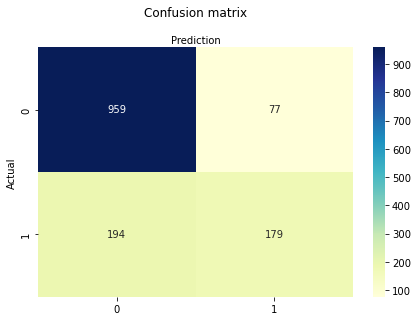

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediction')


#### Classification Report

In [23]:
target_names = ['Churn', 'Not Churn']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       Churn       0.83      0.93      0.88      1036
   Not Churn       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



In [24]:

print("Train Score : {}".format(logreg.score(x_train, y_train)))
print('Test Score : {}'.format(logreg.score(x_test, y_test)))


Train Score : 0.7875399361022364
Test Score : 0.8076650106458482


#### Checking for the imbalance of the data

In [25]:
y.value_counts().to_frame().T

Churn,No,Yes
0,5174,1869


We can see that we are dealing with imbalanced data. So we should use technique such as SMOTE to balance the data.

In [26]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [27]:
y_resampled.value_counts().to_frame().T

Churn,No,Yes
0,5174,5174


From the result we can see that now the dataset is balanced

#### A Scatter plot of an imbalanced dataset

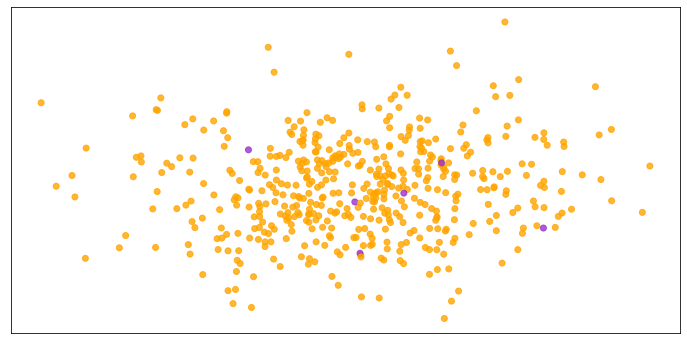

In [28]:
from sklearn.datasets import make_classification
import matplotlib.colors

x, y = make_classification(n_samples=500, 
                            n_classes=2,
                            n_features=2,
                            n_informative=2, 
                            n_redundant=0, 
                            n_repeated=0,
                            weights=[0.99, 1-0.99],
                            class_sep=0.3,
                            random_state=2)

# define the colours to use
my_cmap = matplotlib.colors.ListedColormap(['orange', 'darkorchid'])
# now make a scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=my_cmap, alpha=0.8)
# hide the labels
plt.xticks([])
plt.yticks([])
plt.show();


#### We will apply the SMOTE resampling

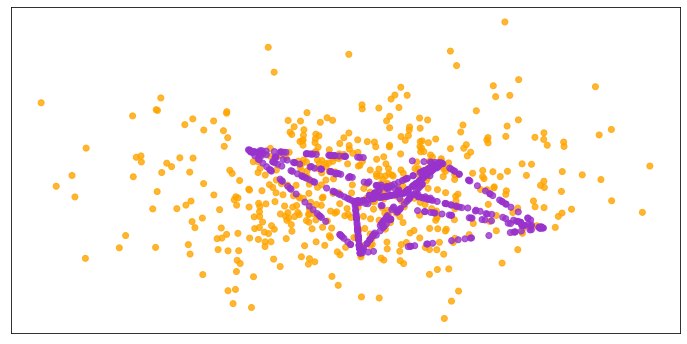

In [29]:
x_resampled, y_resampled = SMOTE().fit_resample(x, y)
# now plot again
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_resampled, cmap=my_cmap, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.show();

#### Modeling again with the resampled data

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size = 0.20, random_state = 42)

In [31]:

x_train = scaler1.fit_transform(x_train)
x_test =  scaler1.transform(x_test)


In [32]:
logreg = LogisticRegression( random_state=42)

In [33]:
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [34]:
y_pred = logreg.predict(x_test)

In [35]:
logreg

LogisticRegression(random_state=42)

In [36]:
cnf_matrix = confusion_matrix(y_test, y_pred)
y_train.shape


(790,)

In [37]:
cnf_matrix

array([[52, 41],
       [33, 72]], dtype=int64)

Text(0.5, 257.44, 'Prediction')

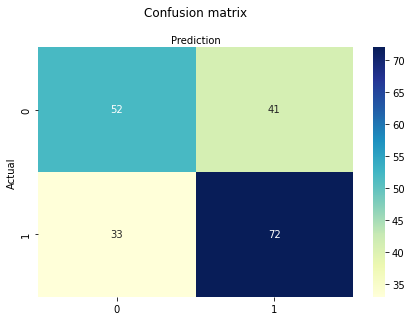

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediction')


After applying the SMOTE for balancing the data, in which case we have downsampled the data we have lost some datapoints as seen in the matrix above.

In [39]:
target_names = ['Churn', 'Not Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Churn       0.61      0.56      0.58        93
   Not Churn       0.64      0.69      0.66       105

    accuracy                           0.63       198
   macro avg       0.62      0.62      0.62       198
weighted avg       0.63      0.63      0.62       198



In [40]:
print("Train Score : {}".format(logreg.score(x_train, y_train)))
print('Test Score : {}'.format(logreg.score(x_test, y_test)))


Train Score : 0.6430379746835443
Test Score : 0.6262626262626263
